In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_excel('../data/Sample - Superstore.xls')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [4]:
# order year
data['Order Year'] = data['Order Date'].dt.year
data['Order Year'].head()

0    2020
1    2020
2    2020
3    2019
4    2019
Name: Order Year, dtype: int32

In [5]:
# revenue 
data['Revenue'] = data['Sales'] * data['Quantity'] * (1 - data['Discount'])
data['Revenue'].describe()

count      9994.000000
mean        990.012401
std        3381.884007
min           0.088800
25%          38.995200
50%         158.152800
75%         647.818800
max      128605.620000
Name: Revenue, dtype: float64

In [6]:
# plot revenue and profit by year dual axis
grouped_data = data.groupby('Order Year')[['Revenue', 'Profit']].sum()
grouped_data.head()

,Revenue,Profit
Order Year,,
2018,2.067592e+06,49543.9741
2019,2.058431e+06,61618.6037
2020,2.679682e+06,81795.1743
2021,3.088479e+06,93439.2696


# Dual Axies Chart

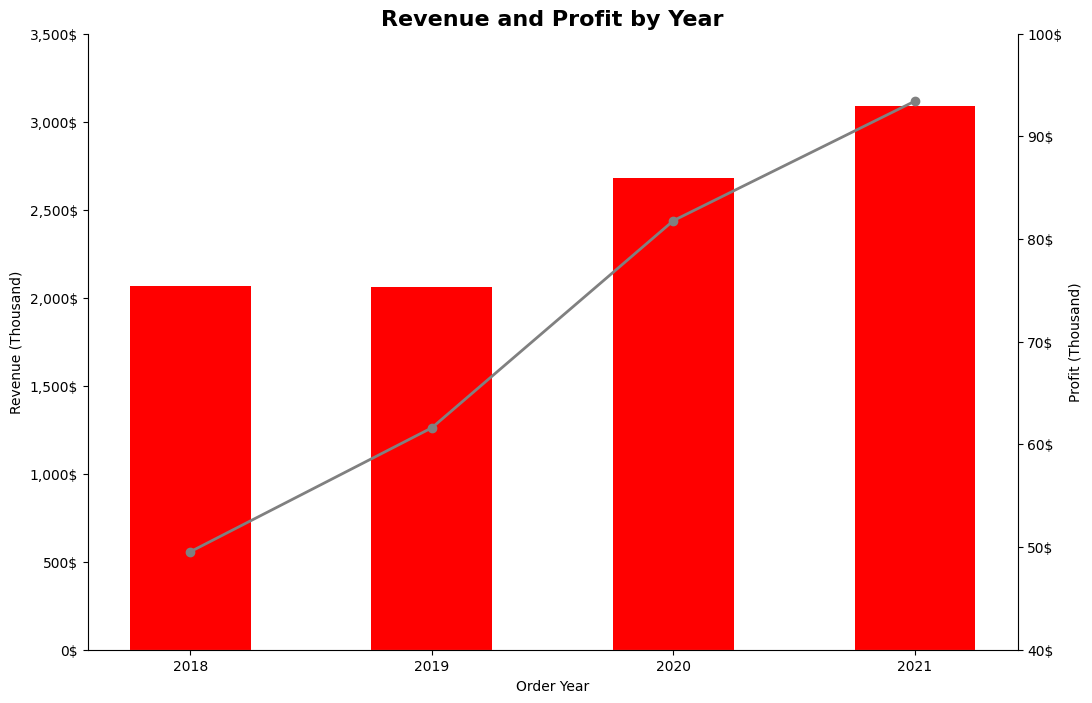

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(grouped_data.index, grouped_data['Revenue'], color='r', width=0.5, label='Revenue')
ax.set_xticks(grouped_data.index)

# Dual y
ax2 = ax.twinx()
ax2.plot(grouped_data.index, grouped_data['Profit'], marker='o', color='grey', linewidth=2)

ax.set_xlabel('Order Year')
ax.set_title('Revenue and Profit by Year', fontdict={'fontsize': 16, 'fontweight': 'bold'})

# Set ytick label for ax
ytick_labels = ax.get_yticks()
ax.set_yticks(ytick_labels)  # Set yticks for ax
ax.set_yticklabels(['{:,.0f}$'.format(ytick/1000) for ytick in ytick_labels])

# Set ytick label for ax2
ytick_labels = ax2.get_yticks()
ax2.set_yticks(ytick_labels)  # Set yticks for ax2
ax2.set_yticklabels(['{:,.0f}$'.format(ytick/1000) for ytick in ytick_labels])

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.spines[['left', 'right', 'bottom' ]].set_color ('#DCDCDC')
ax.spines[['left','right','bottom']].set_color ('#DCDCDC')
# ax.set_yticklabels([str(int(x/1000)) + '$' for x in ax.get_yticks()])
# ax2.set_yticklabels([str(int(x/1000)) + '$' for x in ax2.get_yticks()])
ax.set_ylabel('Revenue (Thousand)')
ax2.set_ylabel('Profit (Thousand)')

plt.show()


# Waterfall Chart

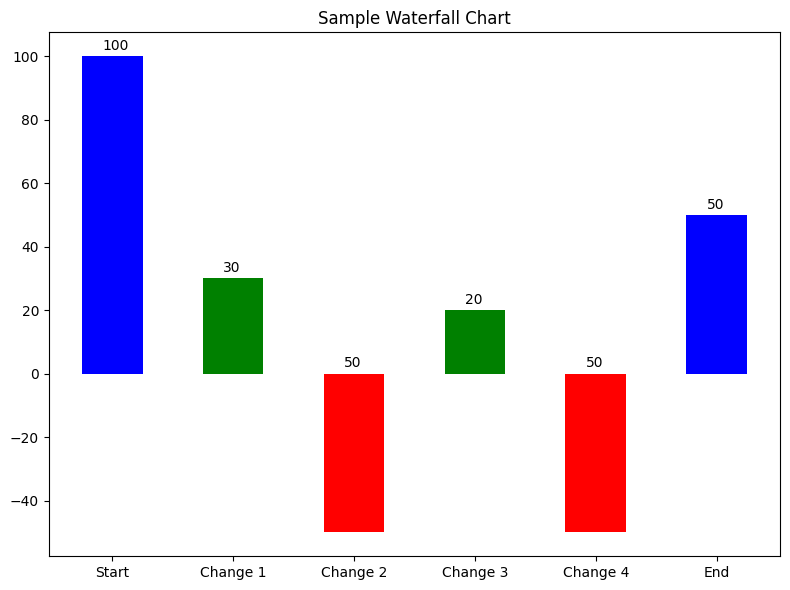

In [8]:
# Final Waterfall Chart Code

# 1. Define the sample data
initial_value = 100
changes = [30, -50, 20, -50]
final_value = initial_value + sum(changes)

# 2. Prepare data for waterfall
data = [initial_value] + changes + [final_value]

# Colors (green for positive, red for negative, blue for start/end)
colors = ['blue'] + ['green' if val > 0 else 'red' for val in changes] + ['blue']

# 3. Create water fall chart
fig, ax = plt.subplots(figsize=(8, 6))

# 4. Make the waterfall plot
ax.bar(range(len(data)), data, width=0.5, tick_label=['Start'] + [f'Change {i+1}' for i in range(len(changes))] + ['End'], color=colors)

for p in ax.patches:
    x, y = p.get_xy()
    w, h = p.get_width(), p.get_height()
    if h < 0:
        y += h
        h *= -1
    ax.annotate('{:.0f}'.format(h), (x + w/3, y+h+2))

# 5. Set labels and title
ax.set_xticks(range(len(data)))
ax.set_xticklabels(['Start'] + [f'Change {i+1}' for i in range(len(changes))] + ['End'])
ax.set_title('Sample Waterfall Chart')

# 6. Display the chart
plt.tight_layout()
plt.show()


In [9]:
index = ['sales','returns','credit fees','rebates','late charges','shipping']
data = {'amount': [350000,-30000,-7500,-25000,95000,-7000]}
trans = pd.DataFrame(data=data,index=index)
trans

,amount
sales,350000
returns,-30000
credit fees,-7500
rebates,-25000
late charges,95000
shipping,-7000


In [10]:
trans['cumsum'] = trans['amount'].cumsum()
trans

,amount,cumsum
sales,350000,350000
returns,-30000,320000
credit fees,-7500,312500
rebates,-25000,287500
late charges,95000,382500
shipping,-7000,375500


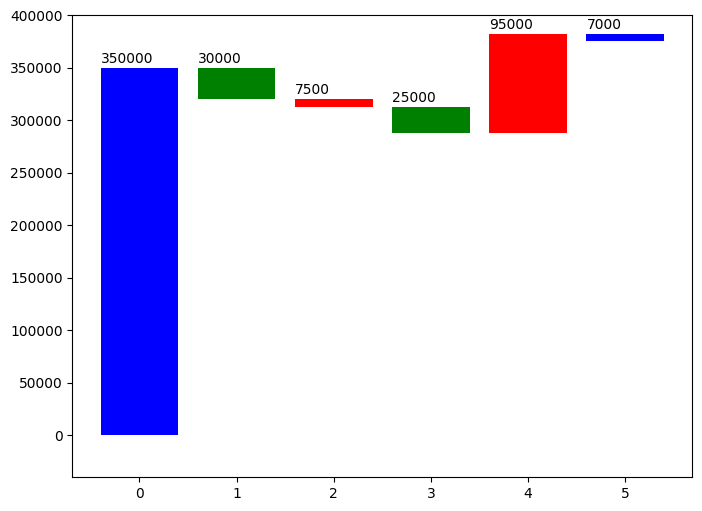

In [22]:
# water fall chart
fig, ax = plt.subplots(figsize=(8, 6))

n = len(trans)
bars = ax.bar(x=range(n), bottom=trans['cumsum'] - trans['amount'], height=trans['amount'], color=colors)
ax.set_ylim(-40000, 400000)

for p in ax.patches:
    x, y = p.get_xy()
    w, h = p.get_width(), p.get_height()
    if h < 0:
        y += h
        h *= -1

    ax.annotate('{:.0f}'.format(h), (x, y+h+5_000))
    

plt.show()


# Positive and Negative Chart

In [23]:
# stacked bar chart
df = pd.DataFrame({'A': [1, 2, 3], 'B': [2, 4, 6], 'C': [5, 5, 5]})
df

,A,B,C
0,1,2,5
1,2,4,5
2,3,6,5
